<a href="https://colab.research.google.com/github/jblack333/ML-1/blob/main/RiosBlack_MachineLearningProject_Spring2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

!pip install seaborn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


downloaded data set from kaggle into github and then loaded it into Google colab

In [46]:
df = "https://raw.githubusercontent.com/jblack333/ML-1/main/Auto.csv"
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates: 'bool | Sequence[Hashable] | None' = None, infer_datetime_format: 'bool | lib.NoDefault' = <no_default>, keep_date_col: 'bool' = False, date_parser=<no_default>, date_format: 'str | None' = None, dayfirst: 'bool' = False, cache_dates: 'bool' = True, iterator: 'bool' = False, chunksize: 'int | None' = None, compression: 'CompressionOptions' = 'infer', thousands: 'str | None' = None, decimal: 'str' = '.', lineterminator: 'str | None' = None, quotechar: 'str' = '"', quoting: 'int' = 0, doublequote: 'bool' = True, escapechar: 'str | None' = None, comment: 'str | None' = None, encoding: 'str | None' = None, encoding_errors: 'str | None' = 'strict', dialect: 'str | csv.Dialect | None' = None, on_bad_lines: 'str' = 'error', delim_whitespace: 'bool' = False, low_memory=True, memory_map: 'bool' = False, float_precision: "Literal['high', 'legacy'] | None" = None, storage_options: 'StorageOptions' = None, dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>) -> 'DataFrame | TextFileReader'>

colab retruned error until a renamed the data set. I renamed it auto.

In [5]:
auto=pd.read_csv(df)

In [6]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


Info shows there are two columns with object data type. horsepower needs to be changed to a float and name will be dropped.

In [7]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

In [8]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


Next is to see if there are missing data and remove these rows.

In [9]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [10]:
auto_cleaned=auto.dropna(axis="index")
auto_cleaned2=auto_cleaned.drop(columns=['name'])
auto_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [11]:
auto_cleaned2.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

In [12]:
auto_cleaned2.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


normalization of data

In [13]:
print(auto_cleaned2.shape)

(392, 8)


In [18]:
scaler=StandardScaler()

In [20]:
scaler.fit(auto_cleaned2)

StandardScaler()

In [21]:
auto_scaled=pd.DataFrame(scaler.transform(auto_cleaned2), index=auto_cleaned2.index, columns=auto_cleaned2.columns)
print(auto_scaled)

          mpg  cylinders  displacement  horsepower    weight  acceleration  \
0   -0.698638   1.483947      1.077290    0.664133  0.620540     -1.285258   
1   -1.083498   1.483947      1.488732    1.574594  0.843334     -1.466724   
2   -0.698638   1.483947      1.182542    1.184397  0.540382     -1.648189   
3   -0.955212   1.483947      1.048584    1.184397  0.536845     -1.285258   
4   -0.826925   1.483947      1.029447    0.924265  0.555706     -1.829655   
..        ...        ...           ...         ...       ...           ...   
392  0.455941  -0.864014     -0.520637   -0.480448 -0.221125      0.021294   
393  2.636813  -0.864014     -0.932079   -1.364896 -0.999134      3.287676   
394  1.097374  -0.864014     -0.568479   -0.532474 -0.804632     -1.430430   
395  0.584228  -0.864014     -0.712005   -0.662540 -0.415627      1.110088   
396  0.969088  -0.864014     -0.721574   -0.584501 -0.303641      1.400433   

         year    origin  
0   -1.625315 -0.716641  
1   -1.6253

Exploritory Data analysis on the cleaned and normalized data.

In [22]:
auto_scaled.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


<ipython-input-24-4e2eea678fe1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto_scaled['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

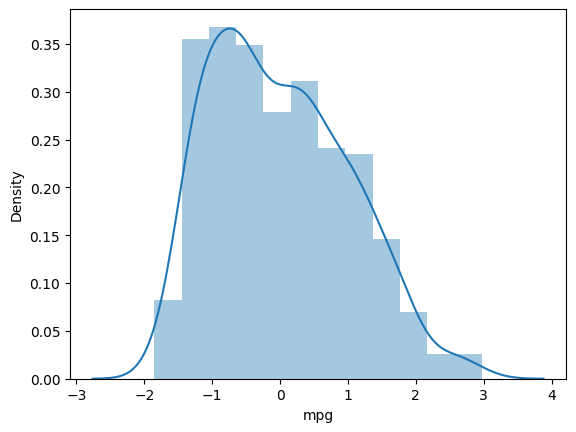

In [24]:
sns.distplot(auto_scaled['mpg'])

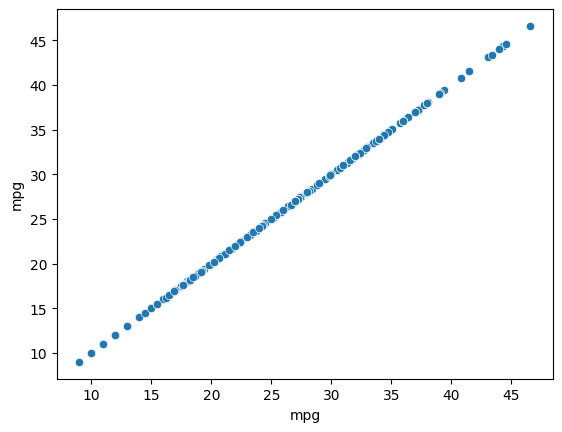

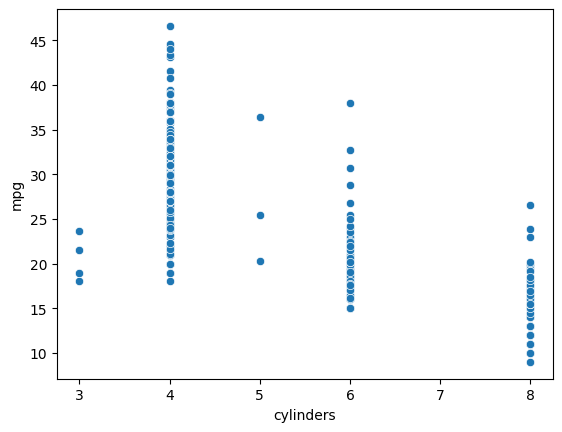

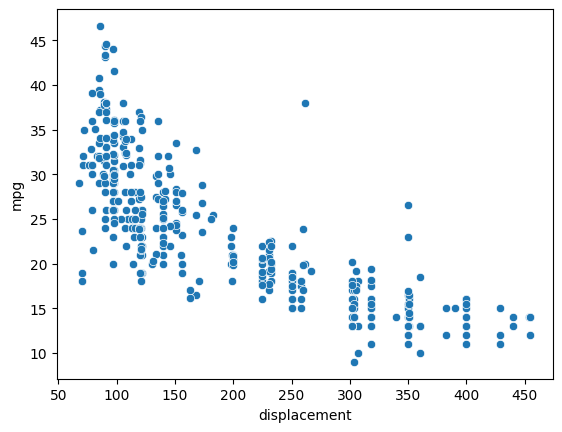

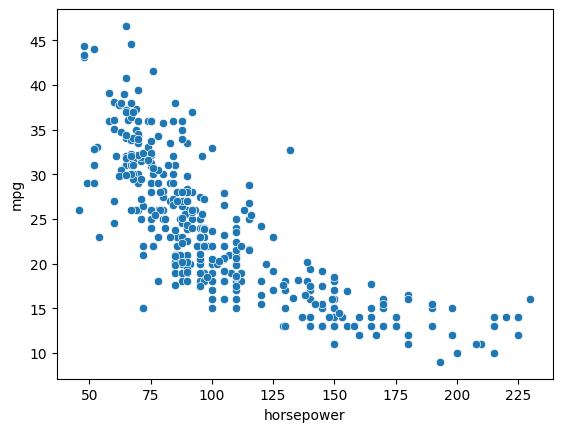

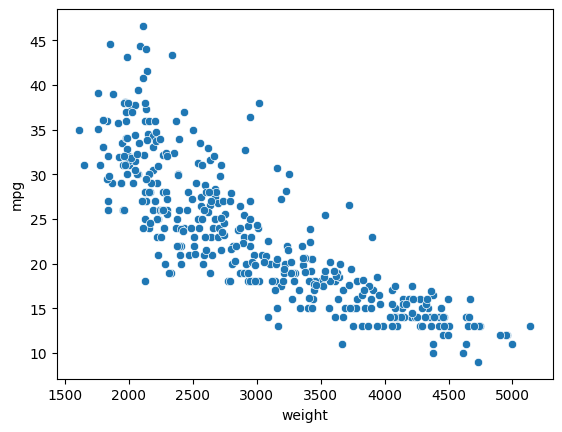

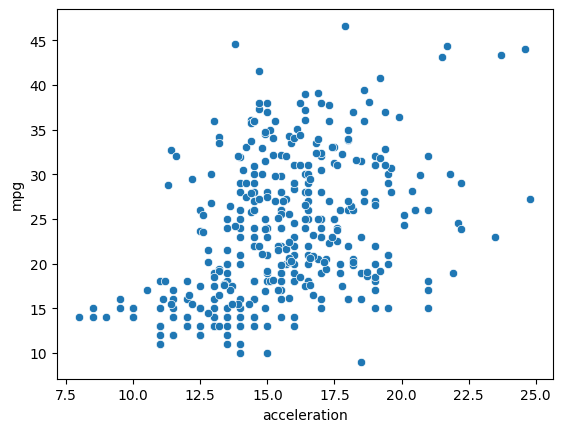

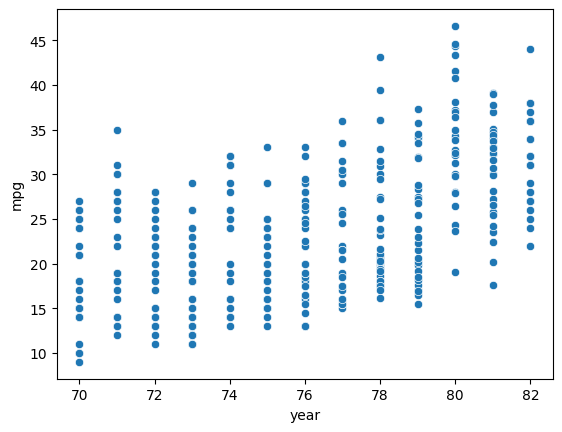

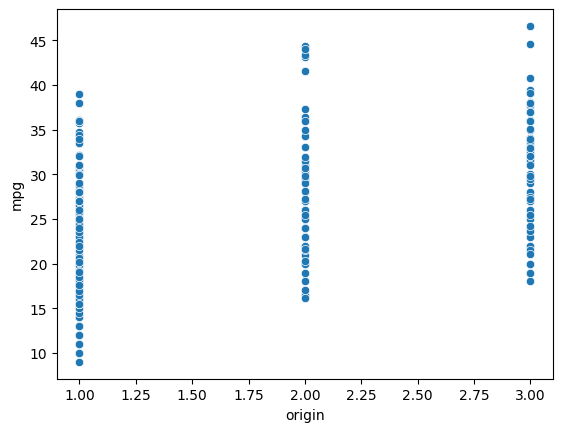

In [25]:
for col in auto_scaled.columns:
  sns.scatterplot(x=col,y='mpg', data=auto_cleaned2)
  plt.show()

Data processing

In [26]:
print(type(auto_scaled))

<class 'pandas.core.frame.DataFrame'>


Split the data set into 80% train, 10% validation and 10% test

Here I am specifically testing the independant variable y, mpg based on horsepower. I have choosen thes two parameters because of the coorelation between them as shown in the exploritory data analysis.

In [27]:
X= pd.DataFrame(auto_scaled['horsepower'])
y=pd.DataFrame(auto_scaled['mpg'])
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

Build the model

The model is built by creating layers based on inout and output data. Keras performs some operation on input to produce output and that output becomes the new imput. This is repeated until the Neural network is built.

In [40]:
model = keras.Sequential([layers.Input(shape=(1,)),
                          layers.Dense(25, activation='relu'),
                          layers.Dense(1)])

ReLU is an activation function benefit is that it can allow complex relationships in the data to be learned. As we see in the Exploritory data analysis, the relationship between mpg and horsepower is non linear, making it more complicated to detect the relationship enough to make an accurate prediction of mpg based on a horsepower input.

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 1.1091 - val_loss: 1.0701
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9893 - val_loss: 0.9374
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8781 - val_loss: 0.8272
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7871 - val_loss: 0.7318
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7089 - val_loss: 0.6504
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6397 - val_loss: 0.5830
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5850 - val_loss: 0.5253
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5384 - val_loss: 0.4778
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4987 - val_loss: 0.4407
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4692 - val_loss: 0.4100
Epoch 11

The models loss and val_loss are decreasing but seem to platue at about 0.3192 and 0.2579 respectively. The Dense layers choosen was 25 because 10 gave worse results and 50 gave negligibly better results. So to prevent overfitting 25 was choosen.

In [43]:
test_loss=model.evaluate(X_test, y_test)
print(f"Test Loss:{test_loss:.4f}")

3/3 [==============================] - 0s 5ms/step - loss: 0.2579
Test Loss:0.2579


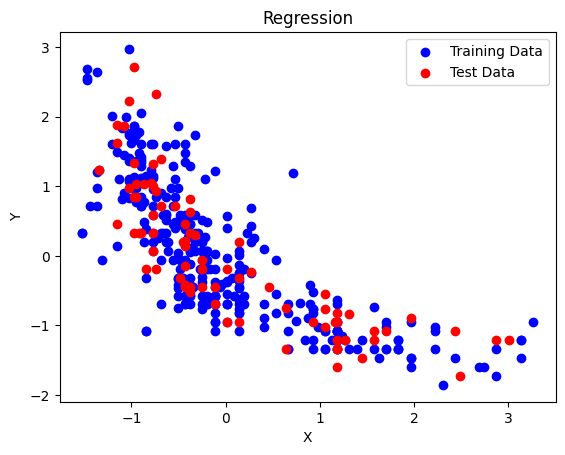

In [53]:
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Regression')
plt.show()

The train and test data have generally the same shape, which resembles the data in the exploritory graph.